In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [87]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [88]:
conso_file = r"Y:\Documents\conso.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188241 entries, 0 to 188240
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Interval  188241 non-null  int64  
 1   kWh       188241 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.9 MB


<Axes: >

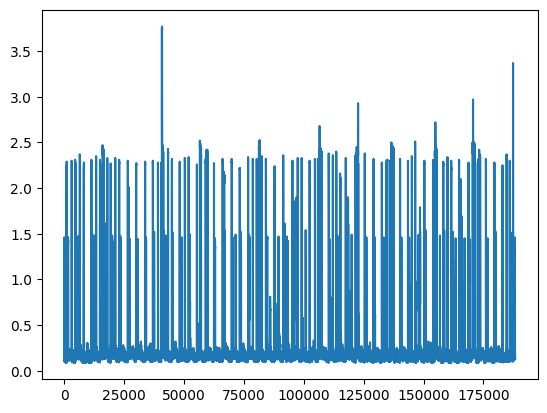

In [89]:
conso_data['kWh'].plot()

In [90]:
l=len(conso_data)-1
l

188240

In [91]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [92]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
188236,27230,0.13,27.230,132.207124,4473468791
188237,27374,0.13,27.374,131.511653,4473496165
188238,27168,0.13,27.168,132.508834,4473523333
188239,27257,0.13,27.257,132.076164,4473550590
188240,27210,0.13,27.210,132.304300,4473577800


In [93]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

4473577800000

In [94]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2024, 3, 7, 1, 51, 13, 757223)

In [95]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    #[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:51:40.046223,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:52:06.289223,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:52:32.174223,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:52:57.928223,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:53:23.702223,07/03/2024
...,...,...,...,...,...,...,...
188236,27230,0.13,27.230,132.207124,4473468791,2024-04-27 20:29:02.548223,27/04/2024
188237,27374,0.13,27.374,131.511653,4473496165,2024-04-27 20:29:29.922223,27/04/2024
188238,27168,0.13,27.168,132.508834,4473523333,2024-04-27 20:29:57.090223,27/04/2024
188239,27257,0.13,27.257,132.076164,4473550590,2024-04-27 20:30:24.347223,27/04/2024


In [96]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day, month, year


('27/04/2024', 4, 2024)

In [97]:
here = now.strftime('%H:%M:%S')
here

'20:30:55'

In [98]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [106]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
184963,34119,0.10,34.119,105.513057,4399744095,2024-04-27 00:00:17.852223,27/04/2024,0:0:17
184964,31973,0.11,31.973,112.595002,4399776068,2024-04-27 00:00:49.825223,27/04/2024,0:0:49
184965,32664,0.11,32.664,110.213079,4399808732,2024-04-27 00:01:22.489223,27/04/2024,0:1:22
184966,34095,0.10,34.095,105.587330,4399842827,2024-04-27 00:01:56.584223,27/04/2024,0:1:56
184967,33683,0.11,33.683,106.878841,4399876510,2024-04-27 00:02:30.267223,27/04/2024,0:2:30
...,...,...,...,...,...,...,...,...
188236,27230,0.13,27.230,132.207124,4473468791,2024-04-27 20:29:02.548223,27/04/2024,20:29:2
188237,27374,0.13,27.374,131.511653,4473496165,2024-04-27 20:29:29.922223,27/04/2024,20:29:29
188238,27168,0.13,27.168,132.508834,4473523333,2024-04-27 20:29:57.090223,27/04/2024,20:29:57
188239,27257,0.13,27.257,132.076164,4473550590,2024-04-27 20:30:24.347223,27/04/2024,20:30:24


In [109]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000
df_grp

,kWh
days,
07/03/2024,3.133
08/03/2024,3.751
09/03/2024,3.082
10/03/2024,3.533
11/03/2024,4.540
12/03/2024,3.558
13/03/2024,3.541
14/03/2024,3.653
15/03/2024,3.564


In [107]:
data = list(df_grp['kWh'])
print(data)


[3.133, 3.751, 3.082, 3.533, 4.54, 3.558, 3.541, 3.653, 3.564, 3.359, 3.35, 4.402, 3.507, 3.442, 3.55, 3.744, 3.527, 3.338, 3.891, 3.418, 3.475, 3.637, 3.756, 3.654, 3.83, 3.837, 3.819, 3.419, 3.476, 4.419, 3.4, 4.074, 3.779, 4.061, 3.432, 3.579, 3.443, 4.116, 3.272, 3.32, 3.701, 3.689, 4.22, 3.283, 3.38, 3.767, 4.091, 3.498, 3.301, 3.292, 3.06, 3.278]


In [108]:

import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [100]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.323517
dtype: float64

In [101]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.620019
dtype: float64

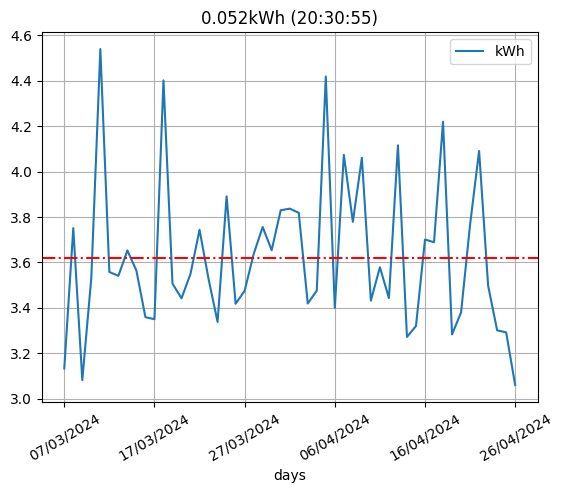

In [102]:
# plot the day consos in the group
df_grp.iloc[:-1].plot(grid=True)
plt.title(str(len(df_grp)/1000)+'kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


In [103]:
conso_day=conso_data[conso_data['days']==day]
conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df

C:\Users\jean\AppData\Local\Temp\ipykernel_10412\36973937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))


,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:17,34119,0.10,34.119,105.513057,4399744095,2024-04-27 00:00:17.852223,27/04/2024
0:0:49,31973,0.11,31.973,112.595002,4399776068,2024-04-27 00:00:49.825223,27/04/2024
0:1:22,32664,0.11,32.664,110.213079,4399808732,2024-04-27 00:01:22.489223,27/04/2024
0:1:56,34095,0.10,34.095,105.587330,4399842827,2024-04-27 00:01:56.584223,27/04/2024
0:2:30,33683,0.11,33.683,106.878841,4399876510,2024-04-27 00:02:30.267223,27/04/2024
...,...,...,...,...,...,...,...
20:29:2,27230,0.13,27.230,132.207124,4473468791,2024-04-27 20:29:02.548223,27/04/2024
20:29:29,27374,0.13,27.374,131.511653,4473496165,2024-04-27 20:29:29.922223,27/04/2024
20:29:57,27168,0.13,27.168,132.508834,4473523333,2024-04-27 20:29:57.090223,27/04/2024


In [104]:
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('20:30:55', 3.278, 3278)

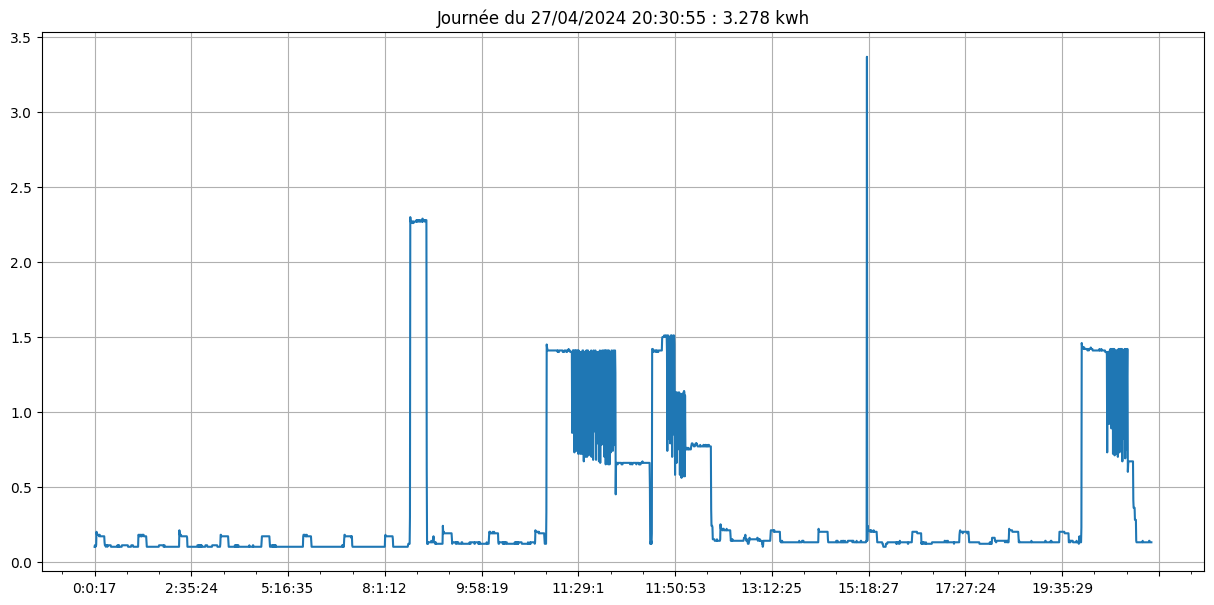

In [105]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
major_ticks=300;minor_ticks=100
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(df['kWh'])
#plt.plot(conso_day['heure'],conso_day['kWh'])
plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
plt.grid()